In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (5,3)

from sklearn import set_config
set_config(print_changed_only=False)



# VARIABLES

#  **Input variables**
**1. age:** (numeric)

**2. job :** type of job (categorical: ‘admin.’,’blue collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)

**3. marital :** marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)

**4. education (categorical:** ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’professional.course’,’university.degree’,’unknown’)

**5. default:** has credit in default? (categorical: ‘no’,’yes’,’unknown’)

**6. housing:** has housing loan? (categorical: ‘no’,’yes’,’unknown’)

**7. loan:** has personal loan? (categorical: ‘no’,’yes’,’unknown’)

**8. contact:** contact communication type (categorical: ‘cellular’,’telephone’)

**9. month:** last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

**10. day** : last contact day

**11. duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**12. campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

**13. pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**14. previous:** number of contacts performed before this campaign and for this client (numeric)

**15. poutcome:** outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
social and economic context attributes


In [14]:
df = pd.read_csv('Insurance.csv')

In [6]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [8]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [ ]:
# we can see the outliers in Balance with big differentiation in maximum vs median.

In [15]:
Insurance = []

for i in df.columns:
    Insurance .append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [16]:
pd.DataFrame(data = Insurance, columns = [
    'Data Feature',
    'Data types',
    'Null',
    'Null pct',
    'Unique',
    'Unique Sample'
])

,Data Feature,Data types,Null,Null pct,Unique,Unique Sample
0,Id,int64,0,0.00,4000,"[422, 942]"
1,Age,int64,0,0.00,70,"[81, 34]"
2,Job,object,19,0.48,11,"[blue-collar, services]"
3,Marital,object,0,0.00,3,"[single, married]"
4,Education,object,169,4.23,3,"[nan, primary]"
5,Default,int64,0,0.00,2,"[0, 1]"
6,Balance,int64,0,0.00,2178,"[444, 1027]"
7,HHInsurance,int64,0,0.00,2,"[0, 1]"
8,CarLoan,int64,0,0.00,2,"[1, 0]"
9,Communication,object,902,22.55,2,"[cellular, nan]"


# Handling Missing Values

In [17]:
df.isnull().sum().sort_values(ascending=False)

Outcome             3042
Communication        902
Education            169
Job                   19
CarLoan                0
Age                    0
Marital                0
Default                0
Balance                0
HHInsurance            0
CarInsurance           0
CallEnd                0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CallStart              0
Id                     0
dtype: int64

In [24]:
df[df.duplicated()]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


there is no duplicated data.

In [20]:
# i have 2 options to fill missing values in col Job and Education.
# fill with mode(most_frequent) and using method='pad' >> fill the missing values with the frontfill
df['Job'] = df['Job'].fillna(method ='pad')
df['Education'] = df['Education'].fillna(method ='pad')

# edu_mode=[]
# job_types = df.Job.unique().tolist()
# job_types.remove(np.nan)
# for job in job_types:
#     mode=df[df.Job==job].Education.mode()[0]
#     edu_mode.append(mode)

# edu_map=dict(zip(job_types,edu_mode))

# for job in job_types:
#     df.loc[(df.Education.isnull())&(df.Job==job),'Education']=edu_map[job]

# df.Education.fillna('None',inplace=True)
# df.Job.fillna('None',inplace=True)

In [21]:
df['Communication'].fillna(df['Communication'].mode()[0], inplace=True)
df['Outcome'].fillna(df['Outcome'].mode()[0], inplace=True)

In [22]:
df.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

In [23]:
# Missing values already imputed

# Handling Outliers

## AGE

- data seems have age outliers, but i wont drop these Age outliers, because those age group are the significant informations for Car Insurance decision

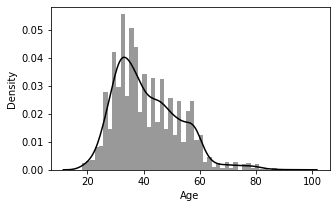

In [43]:
sns.distplot(df.Age,bins=50,color='black',)

plt.show()


95

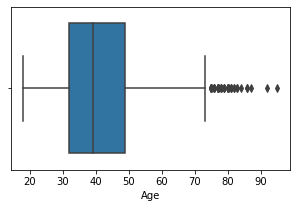

In [44]:
sns.boxplot(x= 'Age',data=df)
df.Age.max()


In [35]:
# i keep the outliers in age

## Balance

98417

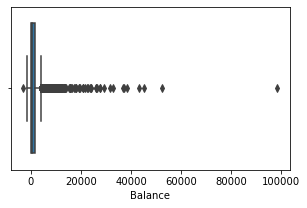

In [45]:
sns.boxplot(x= 'Balance',data=df)
df.Balance.max()


<AxesSubplot:>

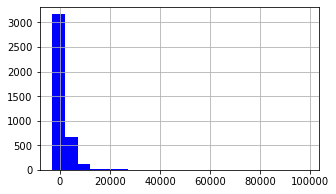

In [46]:
df['Balance'].hist(bins=20,color='b')

In [52]:
max_thresold = df['Balance'].quantile(0.95)
min_thresold = df['Balance'].quantile(0.2)
min_thresold,max_thresold

(323.6, 4313.5999999999985)

In [50]:
df= df[(df['Balance']>min_thresold)&(df['Balance']<max_thresold)]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2799 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                2799 non-null   int64  
 1   Age               2799 non-null   int64  
 2   Job               2799 non-null   object 
 3   Marital           2799 non-null   object 
 4   Education         2799 non-null   object 
 5   Default           2799 non-null   int64  
 6   Balance           2799 non-null   int64  
 7   HHInsurance       2799 non-null   int64  
 8   CarLoan           2799 non-null   int64  
 9   Communication     2799 non-null   object 
 10  LastContactDay    2799 non-null   int64  
 11  LastContactMonth  2799 non-null   object 
 12  NoOfContacts      2799 non-null   int64  
 13  DaysPassed        2799 non-null   int64  
 14  PrevAttempts      2799 non-null   int64  
 15  Outcome           2799 non-null   object 
 16  CarInsurance      2799 non-null   int64  


# FEATURE CREATIONS

In [ ]:
# I make duration call (delta time (callend - call start ) into Seconds unit.

In [53]:
df['CallStart'] = df['CallStart'].astype('datetime64[ns]')
df['CallEnd'] = df['CallEnd'].astype('datetime64[ns]')


KeyError: 'CallStart'

In [27]:
df['Duration'] = (df.CallEnd - df.CallStart).astype('timedelta64[s]')

In [28]:
df.drop(columns=['CallStart','CallEnd'],inplace = True)

# Explanatory Data Analysis

In [80]:
df1 = df.copy()

In [130]:
plt.rcParams['figure.figsize'] = (10,7)

In [82]:
num_var = df._get_numeric_data().columns
num_var

Index(['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan',
       'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CarInsurance', 'Duration'],
      dtype='object')

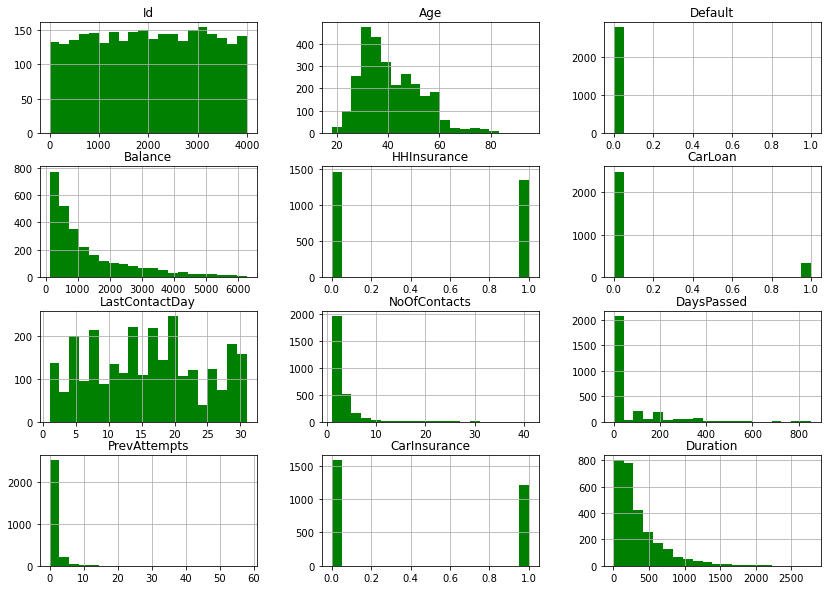

In [83]:
df[num_var].hist(bins=20,color='g',figsize=(14,10))
plt.show()

In [84]:
# Balance and Duration columns is positively skewed

## Target ( CAR INSURANCE )

In [85]:
(pd.crosstab(index=df1['CarInsurance'],columns='count', normalize= True)*100).round(2)

col_0,count
CarInsurance,
0,56.63
1,43.37


Text(0, 0.5, '')

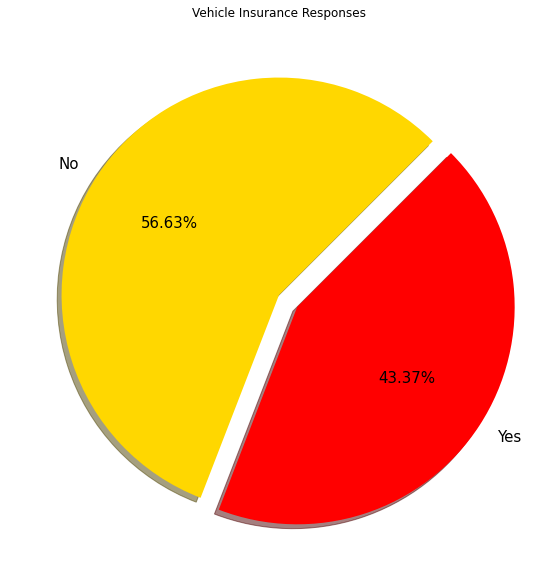

In [86]:
plt.figure(figsize=(10,10))
plt.subplot(aspect=1, title='Vehicle Insurance Responses')
colors = ["gold", "red"]
labels ="No", "Yes"
df1["CarInsurance"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',shadow=True, colors=colors, 
                                             labels=labels, fontsize=15, startangle=45)

plt.ylabel("")

    

## Marital

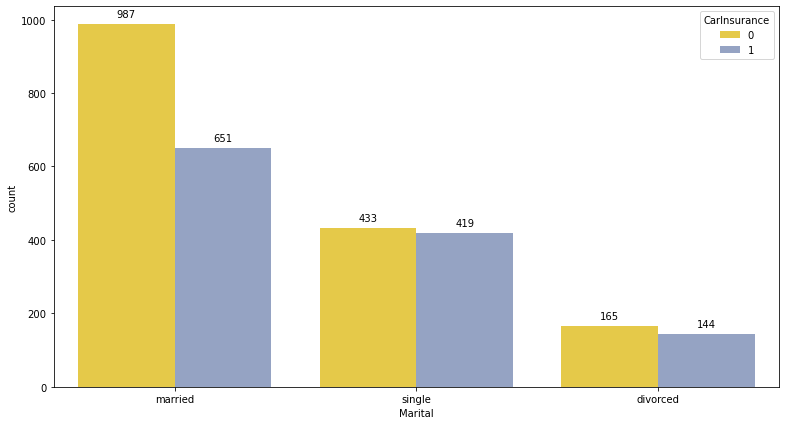

In [87]:
b= sns.countplot('Marital',hue='CarInsurance',data=df,palette= 'Set2_r',order= df1['Marital'].value_counts().index)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


- Married people are most likely to buy car insurance, but the highest ratio is single status followed by divorced.
- Probably, when single and divorced, they have a saving amounts compare to married who need more Saving


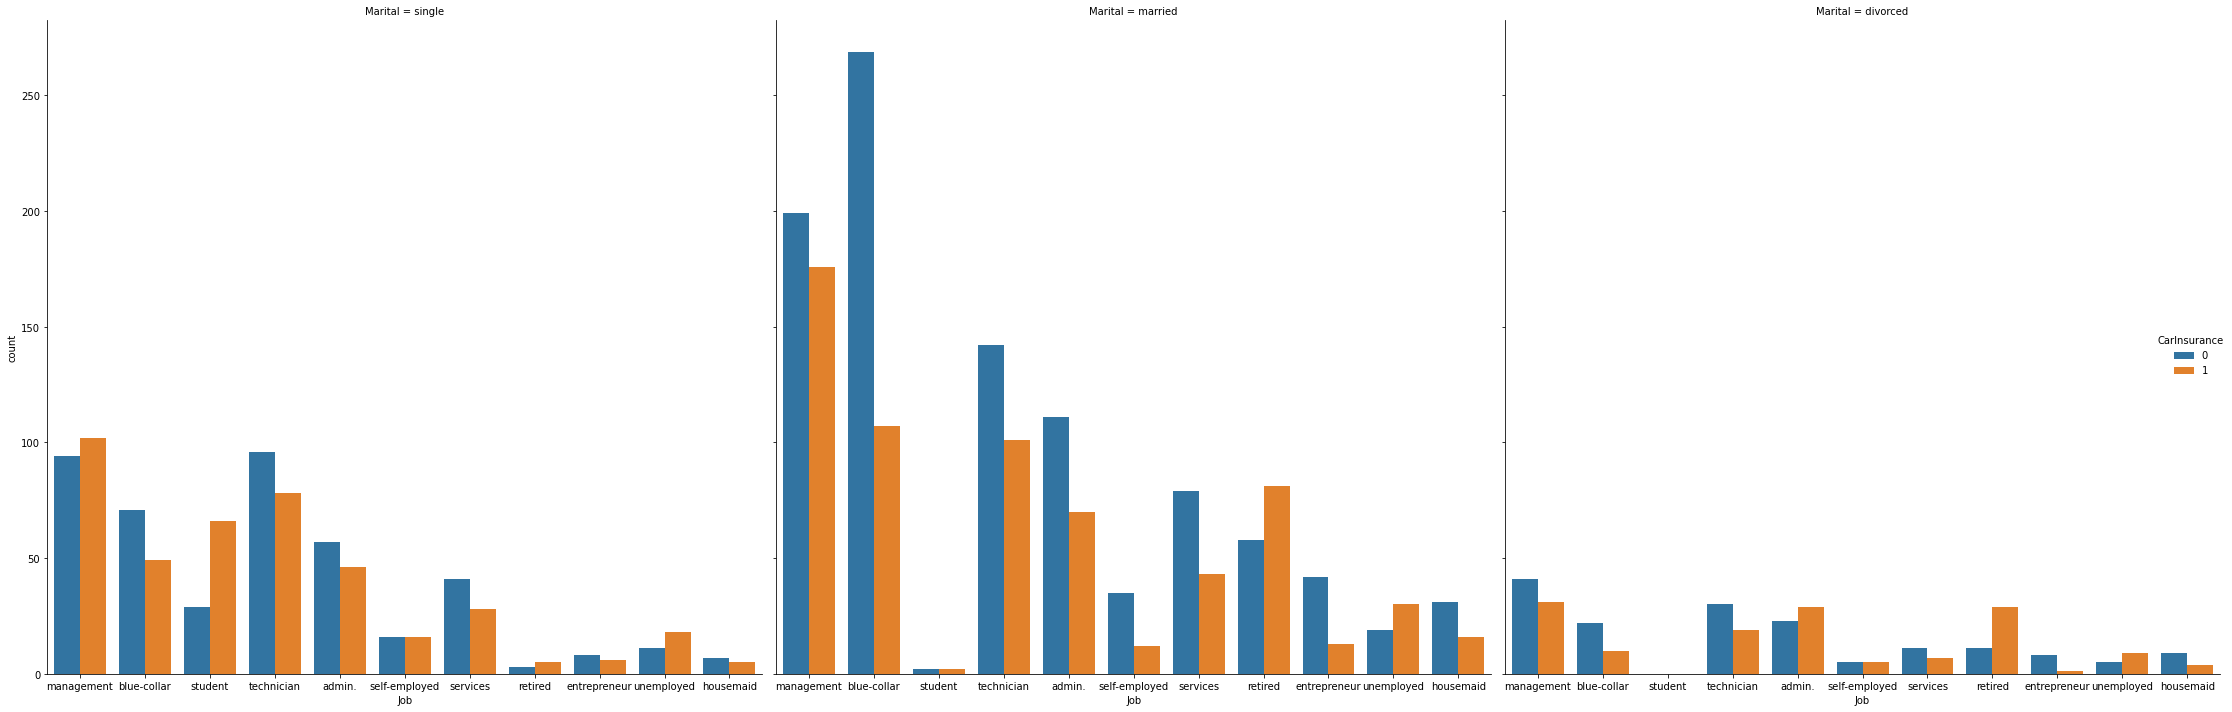

In [88]:
# plt.figure(figsize=(10,6)
sns.catplot(x="Job", hue="CarInsurance", col="Marital", data=df1, kind="count", height=10, aspect=1)
plt.tight_layout()
plt.show()

## Job 

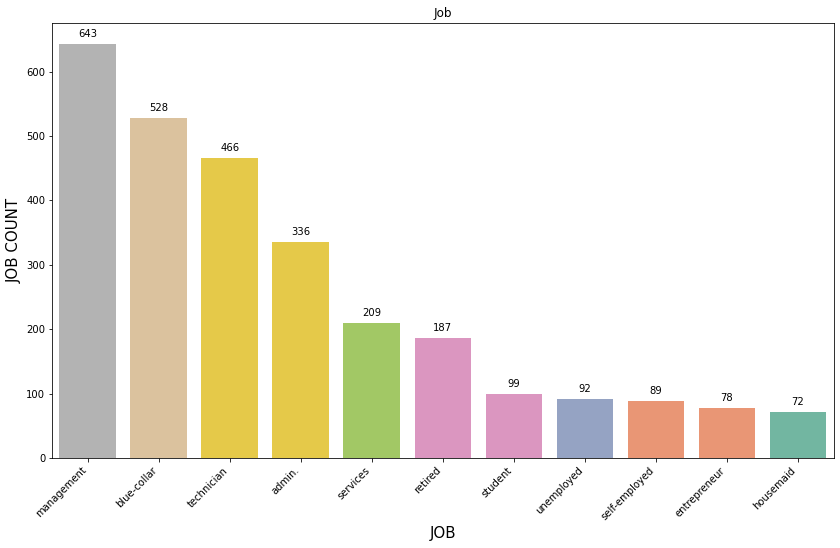

In [89]:
plt.figure(figsize=(14,8))
df1_job = df1['Job'].value_counts().nlargest(15).astype(int)
b = sns.barplot(df1_job.index, df1_job.values,palette= 'Set2_r')


plt.title('Job')
plt.xlabel('JOB',fontsize = 15)
plt.ylabel('JOB COUNT',fontsize = 15)


plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


**Management is the most frequent job**

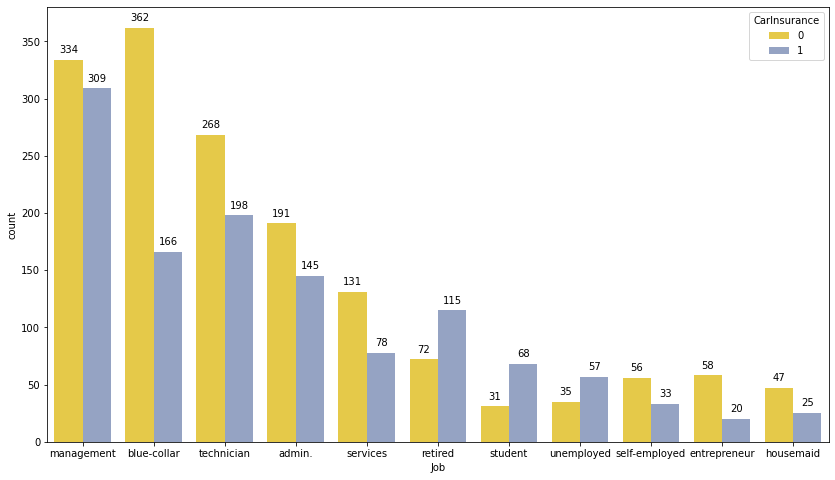

In [90]:
plt.figure(figsize=(14,8))
b= sns.countplot('Job',hue='CarInsurance',data=df,palette= 'Set2_r',order=df1['Job'].value_counts().index)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


- Student is the highest rate to buy insurance, followed by retired and unemployed

## AGE

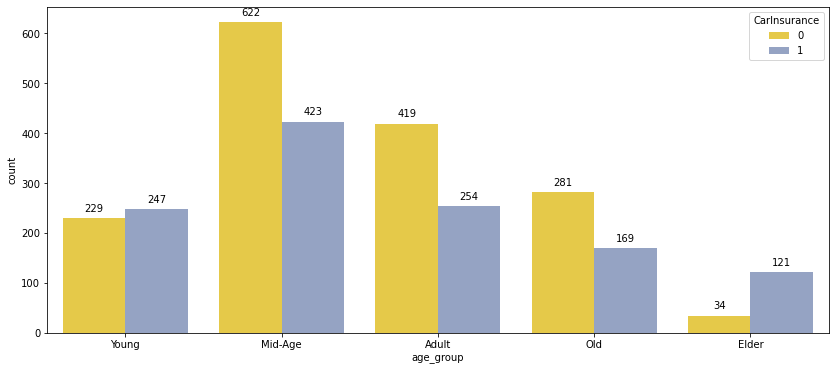

In [96]:
plt.figure(figsize=(14,6))
df1["age_group"]=pd.cut(df1.Age,bins=[0,30,40,50,60,df['Age'].max()],labels=['Young','Mid-Age','Adult',"Old",'Elder'])
b= sns.countplot(data=df1,x="age_group",hue="CarInsurance",palette="Set2_r")

for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 



- Elder group are more likely to buy car insurances with the highest rate

## EDUCATION

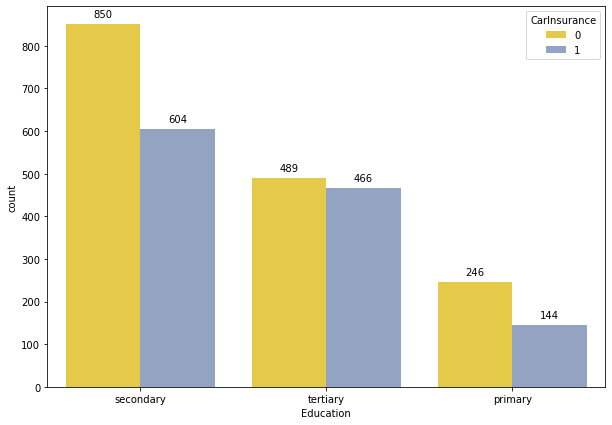

In [100]:
plt.figure(figsize=(10,7))
b= sns.countplot('Education',hue='CarInsurance',data=df1,palette= 'Set2_r',order= df1['Education'].value_counts().index)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 


- higher education is most likely to buy insurance
- tertiary education is the highest rate who buy insurance


## LAST MONTH CONTACT

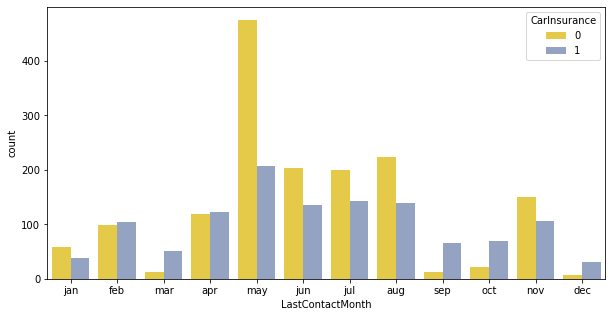

In [102]:
plt.figure(figsize=(10,5))
sns.countplot(x="LastContactMonth",hue="CarInsurance",palette="Set2_r",data=df1,order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"))
plt.show()

- most distributed data are on may
- compared to months contacted, on March, September, October, and December is the highest rate to buy insurance.
- probably the previous marketing is targeting in these months period

## Way to Communicate

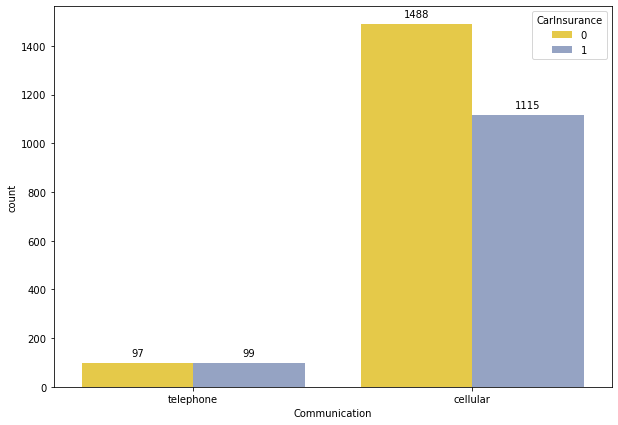

In [127]:
plt.figure(figsize=(10,7))
b= sns.countplot(x="Communication",hue="CarInsurance",palette="Set2_r",data=df1)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

plt.show()

- Marketing is focusing contact the next customer by celullar instead of telephone. People these days is always using their cellphone instead of staying at home and respond to telephone call at home

## Outcome

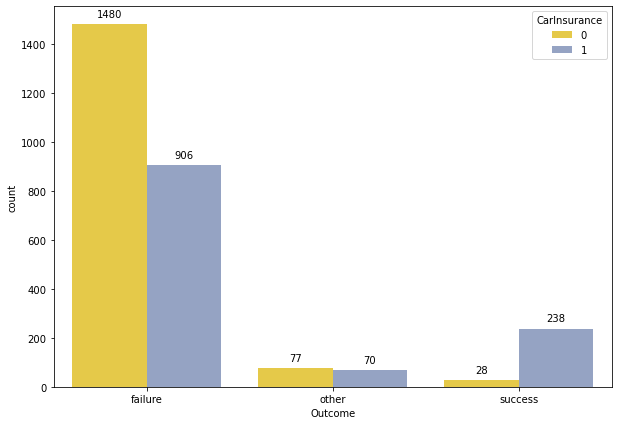

In [126]:
plt.figure(figsize=(10,7))
b=sns.countplot(x="Outcome",hue="CarInsurance",palette="Set2_r",data=df1)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

plt.show()

- the customer is most likely want to buy the insurance after the campaign

## Duration call

In [112]:
avg_duration = df1['Duration'].mean()

lst = [df1]
df1["duration_status"] = np.nan

for col in lst:
    col.loc[col["Duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["Duration"] > avg_duration, "duration_status"] = "above_average"

    
df1['duration_status']

0       below_average
1       below_average
2       below_average
3       above_average
4       below_average
            ...      
3991    below_average
3993    below_average
3996    below_average
3998    below_average
3999    below_average
Name: duration_status, Length: 2799, dtype: object

In [114]:
duration_percent = pd.crosstab(df1['duration_status'], df1['CarInsurance'],normalize ='index')

In [115]:
duration_percent.round(2)

CarInsurance,0,1
duration_status,,
above_average,0.28,0.72
below_average,0.72,0.28


<AxesSubplot:xlabel='duration_status'>

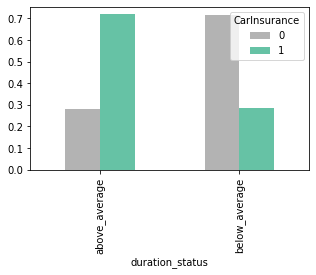

In [116]:
duration_percent.plot(kind='bar',cmap='Set2_r')

- It is obvious, The longer the conversations on the phone, the higher interest the customer will show to buy the insurance

## CAR LOAN

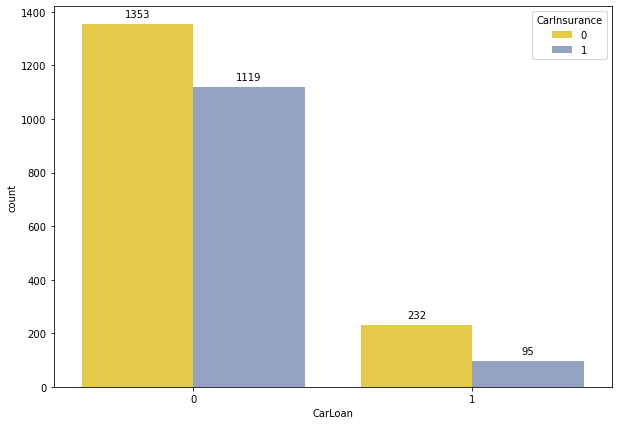

In [129]:
plt.figure(figsize=(10,7))
b=sns.countplot(x="CarLoan",hue="CarInsurance",palette="Set2_r",data=df1)
for p in b.patches:
    b.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points') 

plt.show()

- People who have loaned a car, do not want to buy 

# FEATURE ENGINEERING AND SELECTIONS

<AxesSubplot:>

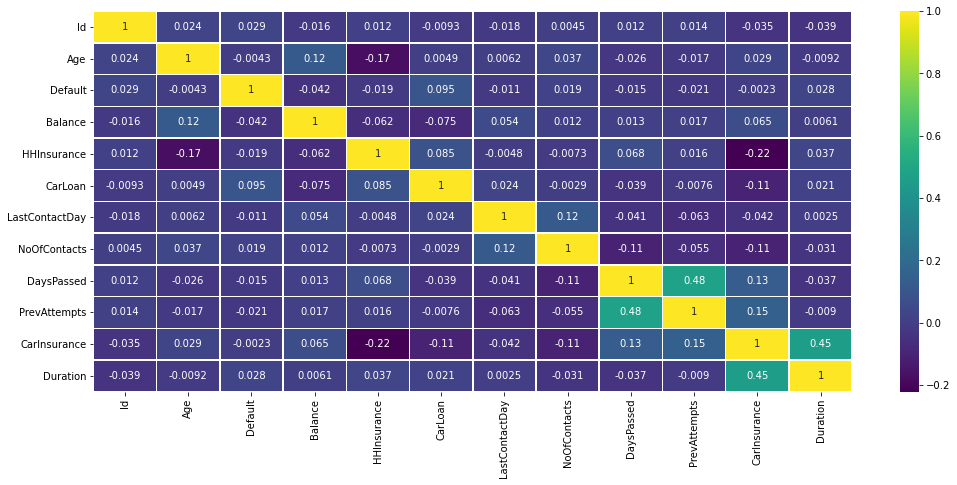

In [133]:
plt.figure(figsize=(17,7))
corr = df1.corr()
sns.heatmap(corr,cmap = 'viridis', annot= True, linewidth = 0.5)

In [134]:
num_top10_corr = df.corr()['CarInsurance'].sort_values(ascending=False).head(20).to_frame()
cm = sns.light_palette("blue", as_cmap=True)
s = num_top10_corr.style.background_gradient(cmap=cm)
s

,CarInsurance
CarInsurance,1.000000
Duration,0.451833
PrevAttempts,0.149010
DaysPassed,0.134181
Balance,0.065184
Age,0.029313
Default,-0.002259
Id,-0.035039
LastContactDay,-0.041928
NoOfContacts,-0.105061


- DURATION has high correlation with Target.
- i will selecting the feature after binning and encoding

## BINNING, ENCODING

### BALANCE

In [136]:
pd.cut(df1['Balance'],4).unique()

[(106.823, 1657.25], (1657.25, 3201.5], (3201.5, 4745.75], (4745.75, 6290.0]]
Categories (4, interval[float64]): [(106.823, 1657.25] < (1657.25, 3201.5] < (3201.5, 4745.75] < (4745.75, 6290.0]]

In [137]:
df1.loc[df1['Balance'] <= 1657.25, 'Balance'] = 0
df1.loc[(df1['Balance'] > 1657.25) & (df1['Balance'] <= 3201.5), 'Balance'] = 1
df1.loc[(df1['Balance'] > 3201.5) & (df1['Balance'] <= 4745.75), 'Balance'] = 2
df1.loc[df1['Balance'] > 4745.75 , 'Balance'] = 3

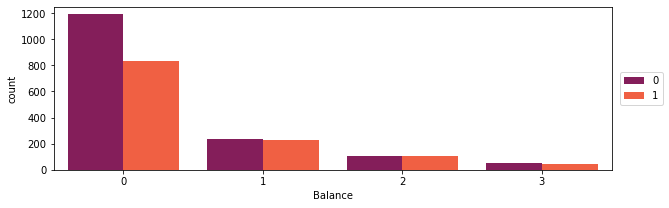

In [138]:
fig, ax = plt.subplots(figsize=(10,3))
g = sns.countplot(data=df1,x='Balance',hue='CarInsurance',palette= 'rocket',saturation= 1)
g.legend(loc='center right', bbox_to_anchor=(1.1, 0.5), ncol=1)

### DURATION CALL STATUS

In [140]:
df1['duration_status'] = df1['duration_status'].map({'below_average' : 0 , 'above_average' : 1})

### AGE GROUP

In [142]:
df1['age_group'].unique()

['Mid-Age', 'Young', 'Adult', 'Old', 'Elder']
Categories (5, object): ['Young' < 'Mid-Age' < 'Adult' < 'Old' < 'Elder']

In [143]:
df1['age_group'] = df1['age_group'].map({'Young' : 0 , 'Mid-Age' : 1, 'Adult' : 2, 'Old': 3, 'Elder' : 4})

### EDUCATION

In [145]:
df1.Education.unique()

array(['tertiary', 'primary', 'secondary'], dtype=object)

In [146]:
df1['Education'] = df1['Education'].map({'secondary' : 1, 'primary' : 2, 'tertiary': 3})

### MARITAL

In [147]:
df1.Marital.unique()

array(['single', 'married', 'divorced'], dtype=object)

In [148]:
df1['Marital'] = df1['Marital'].map({'single' : 0 , 'married' : 1, 'divorced' : 2})

### COMMUNICATION

In [150]:
df1.Communication.unique()

array(['telephone', 'cellular'], dtype=object)

In [151]:
df1['Communication'] = df1['Communication'].map({'telephone' : 0 , 'cellular' : 1})

### OUTCOME

In [153]:
df1.Outcome.unique()

array(['failure', 'other', 'success'], dtype=object)

In [154]:
df1['Outcome'] = df1['Outcome'].map({'failure' : 0 , 'success' : 1,'other': 2})

### LAST CONTACT MONTH

In [156]:
df1['Month'] = df1['LastContactMonth'].map({'jan': 1, 'feb':2, 'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

### DaysPassed

In [162]:
df1['DaysPassed'].unique()

array([ -1, 119, 109,  97, 169, 558, 176, 171, 327,  94, 183, 320,  86,
       184, 728, 105, 122, 317,  90, 412, 155, 350,  92,   1, 179, 107,
        88, 291, 330,  87, 194, 368, 270, 161, 188, 178, 532, 213,  81,
       221, 370, 433, 307, 170, 325, 262, 100,  95, 385, 134,  56, 273,
       182, 106, 323, 138, 246,  93, 133, 252, 301, 238,  98, 195, 204,
       363, 205,  91, 287, 186, 172, 173, 187,  96, 828, 103, 181, 544,
        73, 364, 126, 110, 104, 180, 295, 365, 185, 331, 177, 351, 217,
       152,  13, 409, 130, 114, 141, 247, 151, 189, 322, 165, 164, 306,
       298, 337, 264, 293, 324, 415, 346,  57, 116, 258,  80,  67, 384,
        84, 292, 271,  38,  89, 343, 361, 148, 683, 191, 239,  44, 272,
       340, 297, 294, 267, 193, 321, 495, 154,  43, 208,  36, 147, 775,
       175, 353, 232, 276, 257, 108, 212, 101, 226, 254,  76, 388, 158,
       280, 279, 113,  83, 196, 202, 316,   2, 248, 366, 203, 123, 285,
       439,  78, 102, 371, 265, 137, 160, 352,   5, 149, 345, 20

In [164]:
pd.cut(df1['DaysPassed'],6).unique()

[(-1.855, 141.5], (141.5, 284.0], (426.5, 569.0], (284.0, 426.5], (711.5, 854.0], (569.0, 711.5]]
Categories (6, interval[float64]): [(-1.855, 141.5] < (141.5, 284.0] < (284.0, 426.5] < (426.5, 569.0] < (569.0, 711.5] < (711.5, 854.0]]

In [166]:
df1.loc[df1['DaysPassed'] <= 141.5, 'DaysPassed'] = 0
df1.loc[(df1['DaysPassed'] > 141.5) & (df1['DaysPassed'] <= 284.0), 'DaysPassed'] = 1
df1.loc[(df1['DaysPassed'] > 284.0) & (df1['DaysPassed'] <= 426.5), 'DaysPassed'] = 2
df1.loc[(df1['DaysPassed'] > 426.5) & (df1['DaysPassed'] <=  569.0), 'DaysPassed'] = 3
df1.loc[(df1['DaysPassed'] > 569.0) & (df1['DaysPassed'] <=  711.5), 'DaysPassed'] = 4
df1.loc[df1['DaysPassed'] > 711.5 , 'DaysPassed'] = 5

## ONE HOT ENCODING

In [158]:
df1 = pd.get_dummies(data = df1,columns=['Job'])

# EXPORT CLEANED FILES

In [174]:
df1.drop(['Age','LastContactDay','LastContactMonth','LastContactDay','Duration'],axis=1,inplace=True)

In [175]:
df2 = df1.copy()

In [172]:
pd.set_option('display.max_columns', 500)

In [176]:
df2.head()

,Id,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,age_group,duration_status,Month,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed
0,1,0,3,0,0,1,0,0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
1,2,1,2,0,0,1,0,1,5,0,0,0,0,1,0,5,0,1,0,0,0,0,0,0,0,0,0
2,3,0,3,0,0,1,0,1,1,0,1,0,1,0,0,6,0,0,0,0,1,0,0,0,0,0,0
3,4,0,2,0,0,1,0,1,2,0,0,0,1,0,1,5,0,0,0,0,0,0,0,0,1,0,0
4,5,1,3,0,1,0,0,1,1,0,0,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0


In [177]:
df2.isnull().sum()

Id                   0
Marital              0
Education            0
Default              0
Balance              0
HHInsurance          0
CarLoan              0
Communication        0
NoOfContacts         0
DaysPassed           0
PrevAttempts         0
Outcome              0
CarInsurance         0
age_group            0
duration_status      0
Month                0
Job_admin.           0
Job_blue-collar      0
Job_entrepreneur     0
Job_housemaid        0
Job_management       0
Job_retired          0
Job_self-employed    0
Job_services         0
Job_student          0
Job_technician       0
Job_unemployed       0
dtype: int64

In [178]:
df2.to_csv(r'insurance_cleaned.csv')